In [11]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
df = pd.read_csv("SOL.csv", usecols=['close_timestamp', 'open', 'high', 'low', 'close', 'volume'])
df.head()

,open,high,low,close,volume,close_timestamp
0,9463.5,9463.5,9463.5,9463.5,5.3884,2025-05-21 12:00:00
1,9463.0,9463.0,9463.0,9463.0,2.2309,2025-05-21 12:05:00
2,9463.0,9463.0,9463.0,9463.0,0.0000,2025-05-21 12:10:00
3,9463.0,9463.0,9463.0,9463.0,0.0000,2025-05-21 12:15:00
4,9450.3,9450.3,9450.3,9450.3,2.6427,2025-05-21 12:20:00


In [22]:
df.tail()

,open,high,low,close,volume,close_timestamp
4721,8484.7,8484.7,8484.7,8484.7,1.1786,2025-06-06 20:55:00
4722,8484.7,8484.7,8484.7,8484.7,0.0000,2025-06-06 21:00:00
4723,8484.7,8484.7,8484.7,8484.7,0.0000,2025-06-06 21:05:00
4724,8445.1,8484.6,8445.1,8484.6,3.2978,2025-06-06 21:10:00
4725,8484.7,8484.7,8484.7,8484.7,4.0404,2025-06-06 21:15:00


In [23]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

train = df.iloc[:-50]
test = df.iloc[-50:]

X_train, y_train = train.drop(columns=['close_timestamp','close']), train['close']
X_test, y_test = test.drop(columns=['close_timestamp','close']), test['close']

y_train = y_train / 1e6
y_test = y_test / 1e6

In [24]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4676, number of used features: 4
[LightGBM] [Info] Start training from score 0.009270


LGBMRegressor()

In [25]:
predictions = model.predict(X_test)

In [26]:
y_test = y_test * 1e6
y_pred_original = predictions * 1e6

In [27]:
mae = mean_absolute_error(y_test, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 11.728536282398855
RMSE: 15.54756945714328


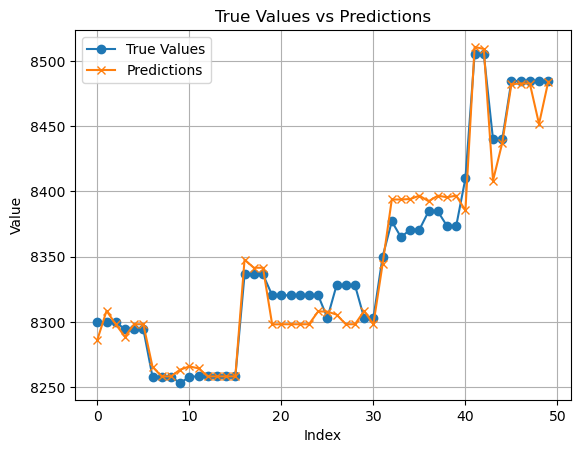

In [28]:
indices = range(len(y_test))  # x-axis: 0, 1, 2, ...

plt.plot(indices, y_test, label='True Values', marker='o')
plt.plot(indices, y_pred_original, label='Predictions', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True Values vs Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
joblib.dump(model, "sol_model.pkl")


['sol_model.pkl']